# Mengubah *Contrast* dan *Brightness*

Seperti kita tahu, gambar merupakan suatu matriks. Ketika melakukan pemrosesan gambar, yang sebenarnya dilakukan adalah melakukan transformasi gambar.
Transformasi gambar dapat dianggap sebagai:
- Operasi titik (transfomasi pixel)
- Operasi *neighborhood* (berbasis area)

Manipulasi titik biasa menggunakan dua operasi matematika: perkalian dan penjumlahan. Secara sederhana, kita bisa rumuskan persamaan linear sebagai berikut.

$$ g(x) = \alpha y(x) + \beta $$
$$ \alpha, \beta > 0 $$

Keterangan: <br/>
$ \alpha $ &nbsp;&nbsp;&nbsp;&nbsp; : *gain* (*contrast*) <br/>
$ \beta $ &nbsp;&nbsp;&nbsp;&nbsp; : *bias* (*brightness*)

Kita bisa pandang $g(x)$ sebagai pixel dari gambar *output* dan $y(x)$ sebagai *input*. Maka,

$$ g(i,j) = \alpha y(i,j) + \beta $$

dengan $i$, $j$ adalah lokasi suatu pixel (baris ke-$i$, kolom ke-$j$)

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "../../media/img1.jpg"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# black
new_img = np.zeros(img.shape, img.dtype)

In [1]:
alpha = 2.0       # [1.0 - 3.0]
beta = 0        # [0 - 100]

# to change all pixels
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            # clip pixel value in [0,255]
            new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)


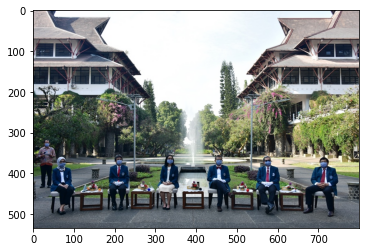

In [2]:
plt.imshow(img)
plt.show()

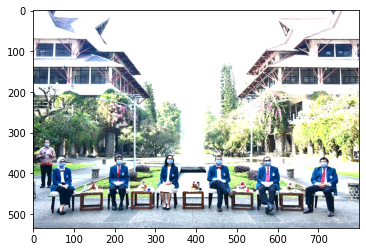

In [3]:
plt.imshow(new_img)
plt.show()

Berikut ini adalah alternatif fungsi untuk mengubah *contrast* dan *brightness*. Waktu eksekusi menggunakan fungsi `cv.convertScaleAbs()` jauh **lebih cepat ~106x** daripada melakukan *looping* untuk mengubah setiap pixel gambar.

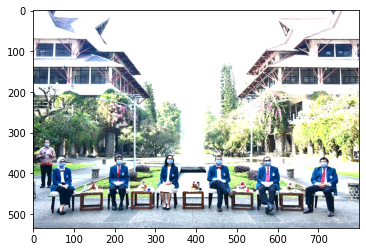

In [4]:
alpha = 2.0
beta = 0
new_img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.imshow(new_img)
plt.show()

<hr>

**Note:**

*Brightness* mengatur tingkat kecerahan gambar secara keseluruhan.

*Contrast* mengatur perbedaan antara warna paling gelap dan paling terang.

<center>
    <img src="https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-C27CD2B1-826F-457B-9F05-273E73FA8FD8-web.gif">
</center>

<hr>

### Referensi
- [*Changing the contrast and brightness of an image!*](https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html)
- [*Contrast And Brightness function*](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/contrast-and-brightness-function.htm#:~:text=Brightness%20increases%20the%20overall%20lightness,the%20darkest%20and%20lightest%20colors.)